Proses pekerjaan kurang lebih **12 Jam** , sebelumnya menggunakan dataset total 6000 gambar, karena validasi mentok 75%, sekarang ditambah menjadi 18000 gambar validasi mentok 80%, dan val_loss naik drastis (Overfit). Mungkin harus ditambahan lagi dataset gambarnya

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Machine\ Learning/HumanCatDog.zip ../tmp/dataset/

In [ ]:
local_zip = '../tmp/dataset/HumanCatDog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../tmp/dataset/')
zip_ref.close()
     
base_dir = '../tmp/dataset/HumanCatDog'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
direktori = os.listdir("/tmp/dataset/HumanCatDog")
sub_dir = os.listdir("/tmp/dataset/HumanCatDog/train")
hitung = 0
hasil_train = []
hasil_val = []

for x in range(len(direktori)):
  for y in range(len(sub_dir)):
      print(f"Jumlah {direktori[x]} = ", len(os.listdir(f"/tmp/dataset/HumanCatDog/{direktori[x]}/{sub_dir[y]}")))
      hitung = len(os.listdir(f"/tmp/dataset/HumanCatDog/{direktori[x]}/{sub_dir[y]}"))

      if direktori[x] == "train":
        hasil_train.append(hitung)
      else:
        hasil_val.append(hitung)

print("Jumlah total train", sum(hasil_train), "\nJumlah total val", sum(hasil_val))

Jumlah validation =  1200
Jumlah validation =  1200
Jumlah validation =  1200
Jumlah train =  4800
Jumlah train =  4800
Jumlah train =  4800
Jumlah total train 14400 
Jumlah total val 3600


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,  
            target_size=(150, 150),  
            batch_size=32,
            class_mode='categorical')     
validation_generator = test_datagen.flow_from_directory(
            validation_dir, 
            target_size=(150, 150), 
            batch_size=32,
            class_mode='categorical')

Found 14398 images belonging to 3 classes.
Found 3598 images belonging to 3 classes.


In [ ]:
model = Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    layers.Conv2D(64, (3,3), strides=(1,1), padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.7),
    layers.Dense(3, activation='softmax')
])

model.layers[0].trainable = False

234561536/234545216 [==============================] - 7s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          1179712   
                                                                 
 batch_normalization (BatchN  (None, 5, 5, 64)         256       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 2, 2, 64)          0         
                                                                 
 flatten (Flatten)           (None, 256)               0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=1e-6),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.8):
            print("\nAkurasi telah mencapai > 85%! dan Val Accuracy telah mencapai 80%!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    epochs=100, callbacks=[callbacks],
                    batch_size=128, verbose=2)

Epoch 1/100
450/450 - 204s - loss: 2.1862 - accuracy: 0.4107 - val_loss: 0.9638 - val_accuracy: 0.5698 - 204s/epoch - 452ms/step
Epoch 2/100
450/450 - 180s - loss: 1.6995 - accuracy: 0.4848 - val_loss: 0.7800 - val_accuracy: 0.6676 - 180s/epoch - 400ms/step
Epoch 3/100
450/450 - 179s - loss: 1.3919 - accuracy: 0.5541 - val_loss: 0.6873 - val_accuracy: 0.7290 - 179s/epoch - 398ms/step
Epoch 4/100
450/450 - 179s - loss: 1.2164 - accuracy: 0.5881 - val_loss: 0.6336 - val_accuracy: 0.7549 - 179s/epoch - 398ms/step
Epoch 5/100
450/450 - 179s - loss: 1.0837 - accuracy: 0.6188 - val_loss: 0.5982 - val_accuracy: 0.7713 - 179s/epoch - 397ms/step
Epoch 6/100
450/450 - 179s - loss: 0.9680 - accuracy: 0.6514 - val_loss: 0.5757 - val_accuracy: 0.7774 - 179s/epoch - 397ms/step
Epoch 7/100
450/450 - 179s - loss: 0.8569 - accuracy: 0.6839 - val_loss: 0.5569 - val_accuracy: 0.7802 - 179s/epoch - 399ms/step
Epoch 8/100
450/450 - 180s - loss: 0.8068 - accuracy: 0.7027 - val_loss: 0.5485 - val_accuracy: 0

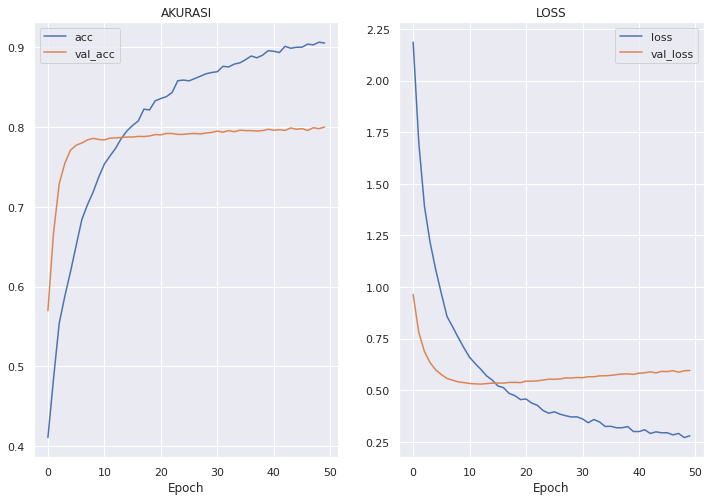

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.plot(history.history["accuracy"], label="acc")
ax1.plot(history.history["val_accuracy"], label="val_acc")
ax1.set_title("AKURASI")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(history.history["loss"], label="loss")
ax2.plot(history.history["val_loss"], label="val_loss")
ax2.set_title("LOSS")
ax2.set_xlabel("Epoch")
ax2.legend()
plt.show()

In [38]:
save_path = 'drive/MyDrive/Machine Learning/mymodel/'
tf.saved_model.save(model, save_path)

In [40]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

with tf.io.gfile.GFile(f'{save_path}model_tflite.tflite', 'wb') as f:
    f.write(tflite_model)